# Classification on CIFAR 10 Dataset

Instructions - 
1. In order to kick start, code for setting up the dataframes has already been given (Step 1 to 5)
2. Go through the entire code written below and put the relavent comment for each line of code. Understanding below mentioned code is very important.
3. After commenting the code in step 1 to 5, complete step 6 and 7

### Step - 1 (Setup Code)

In [26]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Step - 2 (Download the dataset)

In [32]:
# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'

!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!del cifar-10-python.tar.gz

--2021-11-27 06:28:08--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  27.0MB/s    in 6.8s    

2021-11-27 06:28:15 (24.0 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
/bin/bash: del: command not found


### Step - 3 (Load the Dataset)

In [33]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### Step - 4 (Visualization)

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

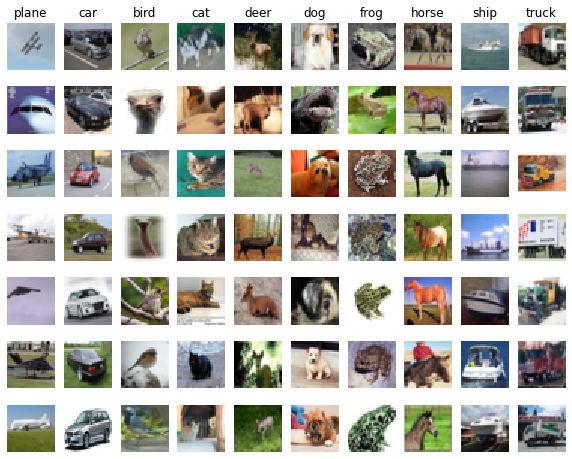

In [34]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Step - 5 (Flattening the images)

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [36]:
# Step 5 - Flatten the Images

# Subsample the data for more efficient code execution in this exercise

try:
    del X_train, y_train, X_val
    del X_test, y_test,y_val
    print('Clear previously loaded data.')
except:
    pass
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

num_training=15000
val=1000
mask = range(num_training, num_training + val)
X_val = X_train[mask]
y_val = y_train[(mask)]
y_val = np.ravel(y_val)

mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]
y_train = np.ravel(y_train)

num_test = 5000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]
y_test = np.ravel(y_test)


# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print('X_train and X_test shapes: ',X_train.shape, X_test.shape)
print('y_train and y_test shapes: ',y_train.shape, y_test.shape)
print('X_val and y_val shapes: ' ,X_val.shape, y_val.shape)

X_train and X_test shapes:  (15000, 3072) (5000, 3072)
y_train and y_test shapes:  (15000,) (5000,)
X_val and y_val shapes:  (1000, 3072) (1000,)


### Step - 6 (Apply all possible classification algorithms)

#Step 6
#The intuition behind KNN algorithm
The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K nearest neighborhood.

Step-2: Calculate the Euclidean distance of K number of neighbors to the given datapoint.

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance to the given point.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Pros

It is simple to implement.

It is robust to the noisy training data.

Cons

The computation cost is expensive, because of calculating the distance between the data points for all the training samples.
It is lazy algorithm as it doesnt learn from the training data and instead it stores the dataset.

In [39]:
# Implementing the K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
import time
# Getting k from the user
k = int(input("Enter the value of k for k-Nearest Neighbor Classifier: "))
knn = KNeighborsClassifier(n_neighbors=k)   

tic = time.time()
knn.fit(X_train, y_train)
toc = time.time()
duration=toc-tic
print('Training duration is: ',duration)

start=time.time()
y_val_predict= knn.predict(X_val)
completed=time.time()
duration2=completed-start
print('Validation duration is:',duration2)

print("K- Neighbors Prediction")
print(classification_report(y_val, y_val_predict))

Enter the value of k for k-Nearest Neighbor Classifier: 3
Training duration is:  0.03412985801696777
Validation duration is: 2.5489158630371094
K- Neighbors Prediction
              precision    recall  f1-score   support

           0       0.26      0.55      0.36        89
           1       0.36      0.12      0.18       103
           2       0.20      0.51      0.29       106
           3       0.22      0.18      0.19       108
           4       0.21      0.36      0.26       103
           5       0.53      0.17      0.26        93
           6       0.25      0.17      0.20       111
           7       0.59      0.10      0.17       102
           8       0.37      0.45      0.40        91
           9       0.40      0.06      0.11        94

    accuracy                           0.26      1000
   macro avg       0.34      0.27      0.24      1000
weighted avg       0.34      0.26      0.24      1000



Classification Report
Precision is defined as the ratio of true positives to the sum of true and false positives.

Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

F1_score is the weighted harmonic mean of precision and recall.

Support is the number of actual occurrences of the class in the dataset.

From the classification report, it can be seen that the model has an average performance ranging from 30 to 50 for precision, recall, f1-score. Accuracy shows in value of 28%

#Intution behind SVM algorithm
SVM algorithm helps to find the best line or decision boundary; this best boundary or region is called as a hyperplane.The distance between the vectors and the hyperplane is called as margin. And the goal of SVM is to maximize this margin.

Hyperplane It is use to find out the best decision boundary that helps to classify the data points.

SuportVectors the data points that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector.

Pros

It works really well with a clear margin of separation.

It is effective in high dimensional spaces.

Cons

It doesn’t perform well when we have large data set because the required training time is higher.

It also doesn’t perform very well, when the data set has more noise

In [41]:
# Implementing the Support Vector Classifier

from sklearn.svm import SVC
import time

clf = SVC()  

tic = time.time()
clf.fit(X_train, y_train)
toc = time.time()
duration=toc-tic
print('Training duration is: ',duration)

start=time.time()
y_val_predict= clf.predict(X_val)
completed=time.time()
duration2=completed-start
print('Validation duration is:',duration2)

print("SVC Prediction")
print(classification_report(y_val, y_val_predict))

Training duration is:  495.87571001052856
Validation duration is: 36.27281141281128
SVC Prediction
              precision    recall  f1-score   support

           0       0.56      0.51      0.53        89
           1       0.58      0.52      0.55       103
           2       0.34      0.39      0.36       106
           3       0.33      0.33      0.33       108
           4       0.38      0.36      0.37       103
           5       0.36      0.33      0.34        93
           6       0.39      0.41      0.40       111
           7       0.51      0.40      0.45       102
           8       0.59      0.60      0.60        91
           9       0.48      0.62      0.54        94

    accuracy                           0.44      1000
   macro avg       0.45      0.45      0.45      1000
weighted avg       0.45      0.44      0.44      1000



#Intuition behind naive bayes
Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.

Where,

P(A|B) is Posterior probability: Probability of hypothesis A on the observed event B.

P(B|A) is Likelihood probability: Probability of the evidence given that the probability of a hypothesis is true.

P(A) is Prior Probability: Probability of hypothesis before observing the evidence.

P(B) is Marginal Probability: Probability of Evidence.

Pros

It performs well in Multi-class predictions as compared to the other Algorithms.
It is the most popular choice for text classification problems.
Cons

Naive Bayes assumes that all features are independent or unrelated, so it cannot learn the relationship between features.

In [42]:
# Implementing the Naive-Bayes Classifier

from sklearn.naive_bayes import GaussianNB
import time

naive_bayes_clf=GaussianNB()

tic = time.time()
naive_bayes_clf.fit(X_train, y_train)
toc = time.time()
duration=toc-tic
print('Training duration is: ',duration)

start=time.time()
y_val_pre= naive_bayes_clf.predict(X_val)
completed=time.time()
duration2=completed-start
print('Validation duration is:',duration2)

print("NB Prediction")
print(classification_report(y_val, y_val_pre))

Training duration is:  0.606419563293457
Validation duration is: 0.15823078155517578
NB Prediction
              precision    recall  f1-score   support

           0       0.29      0.51      0.37        89
           1       0.40      0.17      0.23       103
           2       0.19      0.07      0.10       106
           3       0.24      0.06      0.10       108
           4       0.23      0.38      0.28       103
           5       0.33      0.32      0.33        93
           6       0.20      0.40      0.26       111
           7       0.31      0.10      0.15       102
           8       0.41      0.46      0.44        91
           9       0.36      0.45      0.40        94

    accuracy                           0.28      1000
   macro avg       0.30      0.29      0.27      1000
weighted avg       0.29      0.28      0.26      1000



### Step - 7 (Compare all the models)

The table representing the accuracies & F1 Score of the Classification Algorithms

                                   Algorithm	Accuracy  F1_Score   
                                    KNN	        31	     30	
                                    SVM	        45	     44	
                                    NB	        29	     26

Conclude by following below mentioed steps -
1. Plot a table showing all the algorithms used and corresponding performance metrics
2. Is there any one algorithm that can be used on all the datasets? (Hint: Read about 'No Free Lunch' theorem)